In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('gdrive/MyDrive/Datasets/Diabetes_Dataset.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Creating Feature Attributes

In [ ]:
feature_attribute = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
x = df[feature_attribute]
x

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y = df.outcome
y

0      tested_positive
1      tested_negative
2      tested_positive
3      tested_negative
4      tested_positive
            ...       
763    tested_negative
764    tested_negative
765    tested_negative
766    tested_positive
767    tested_negative
Name: outcome, Length: 768, dtype: object

Creating Target Attribute

In [ ]:
y = y.map({'tested_positive': 1, 'tested_negative': 0})
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision = DecisionTreeClassifier()
decision = decision.fit(x_train,y_train)

In [ ]:
y_pred = decision.predict(x_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', round(100*accuracy, 2), '%')

Accuracy : 71.86 %


Visualization

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

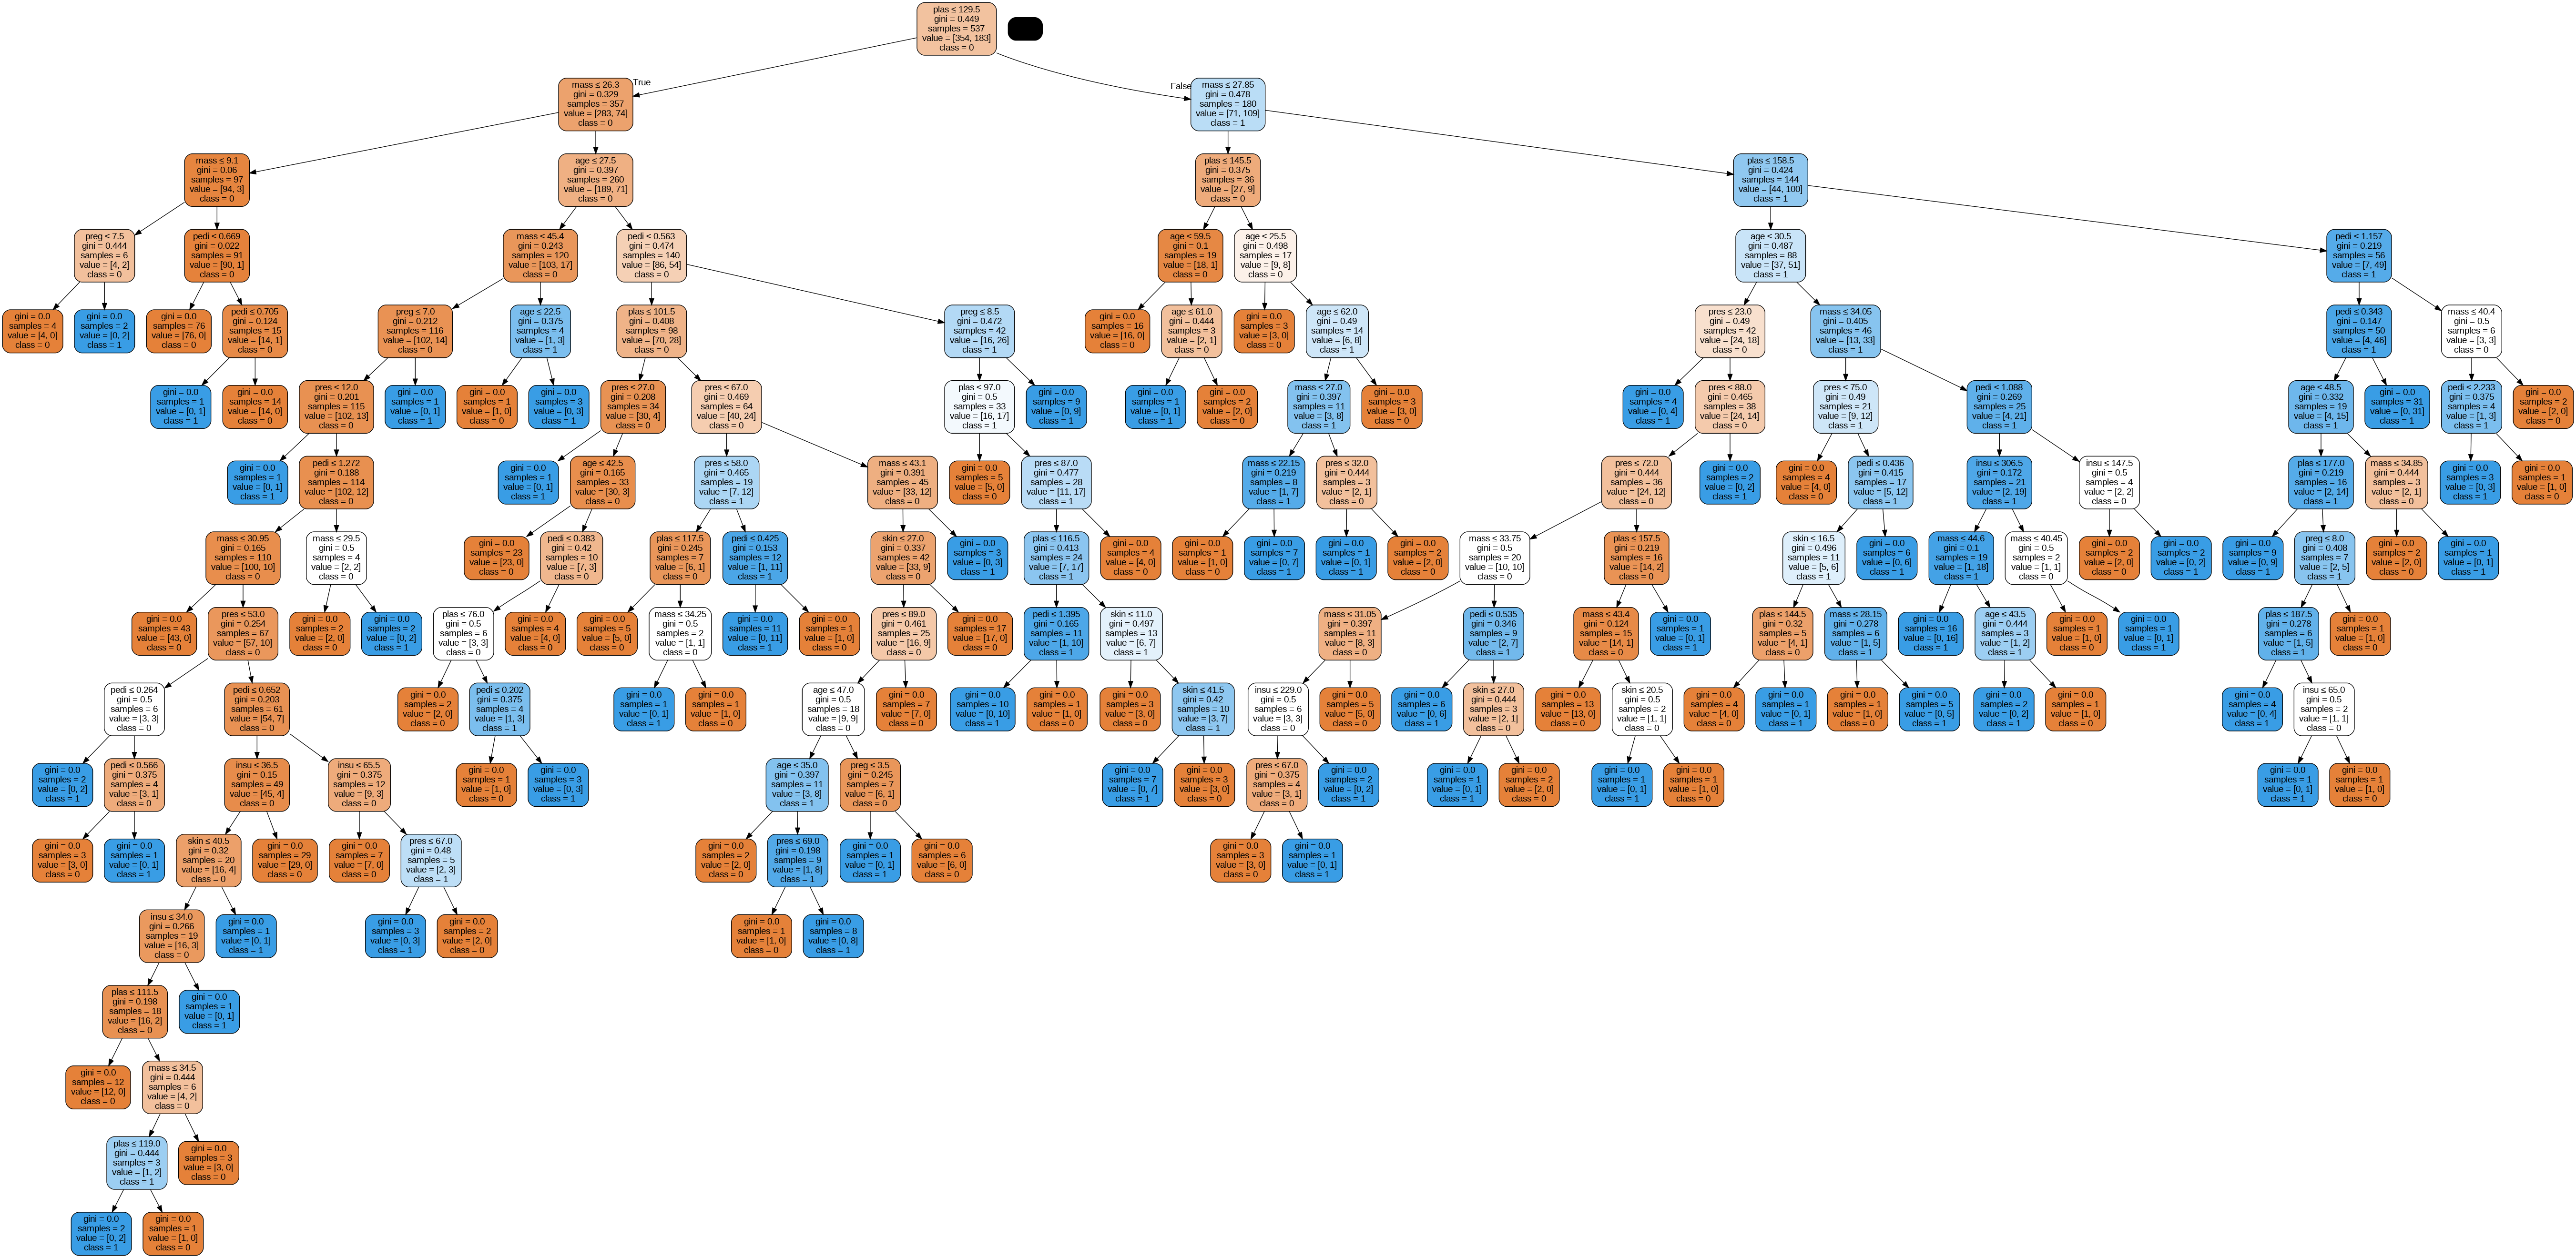

In [ ]:
dot_data = StringIO()
export_graphviz(decision, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_attribute,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

Optimizing the Tree

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy :', round(metrics.accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy : 77.06 %


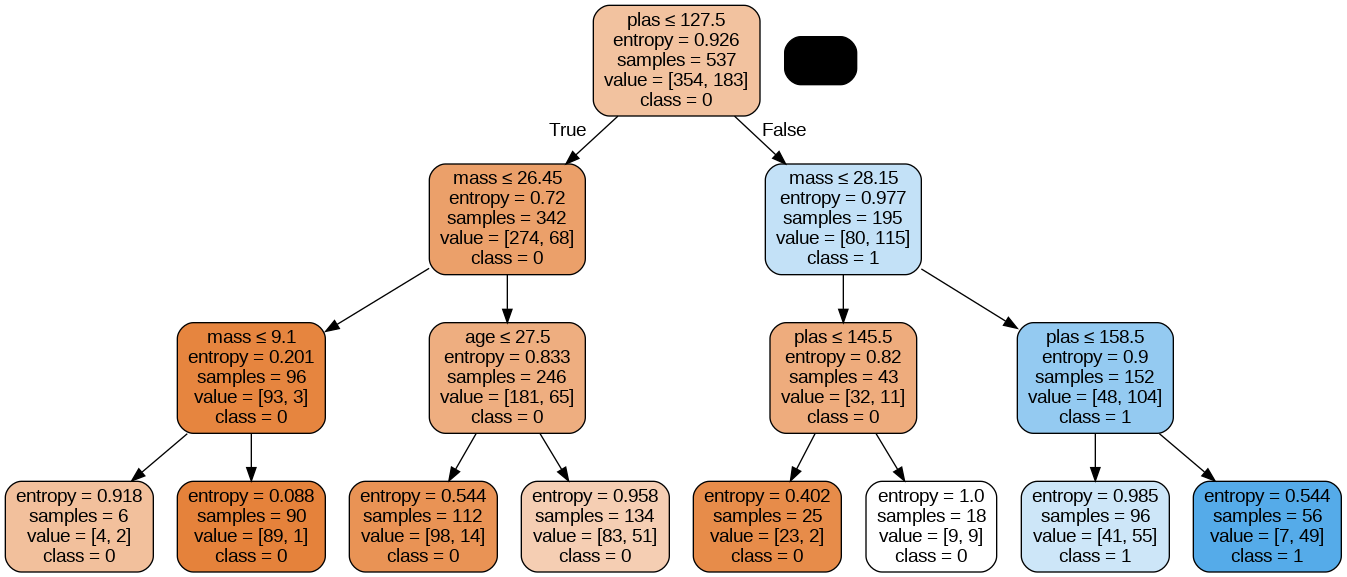

In [ ]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_attribute,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())